# Little notebook to plot HNL constraints (mixing vs mass)

### A little module that compiles all constraints together

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from Nlimits import *
from Nlimits.constraint_dict import *

In [3]:
import numpy as np
from matplotlib import rc, rcParams
import matplotlib.lines as mlines
import matplotlib.pyplot as plt
from matplotlib.pyplot import *
from scipy import interpolate
import scipy.stats
import sys
import scipy.ndimage as ndimage
import os
from scipy import interpolate
import matplotlib.tri as tri

### aux plotting functions

In [4]:
def plot_ID_individual(axis,listoffiles):
    for i in range(np.size(listoffiles)):
        filename = listoffiles[i]

        if (np.size(filename) == 2):
            name = PATH+filename[0]
        else:
            name = PATH+filename

        m4, Umu4sq = np.genfromtxt(name, unpack=True)
        
        ax.plot(m4/3.0,ualpha4SQR(m4/3.0,gX,m4),label=labels[i],color=colors[i])


# ELECTRON

In [5]:
label={"e" : r"$|U_{e 4}|^2$", 
       "mu" : r"$|U_{\mu 4}|^2$", 
       "tau" : r"$|U_{\tau 4}|^2$"}

In [60]:
def plot_lines(flavor, save=False, invisible=False, m4min=1e-3,m4max=1e2, units = 1):
    fsize = 11
    rc('text', usetex=True)
    params={'axes.labelsize':fsize,'xtick.labelsize':fsize,'ytick.labelsize':fsize,\
                    'figure.figsize':(2*3.375,1.5*2.375)	}
    rc('font',**{'family':'serif', 'serif': ['computer modern roman']})
    rcParams.update(params)
    axes_form  = [0.1,0.16,0.85,0.76]


    fig = plt.figure()
    ax = fig.add_axes(axes_form)


    #############
    # get bounds
    list_of_bounds=umu4.get_individual_bounds(muon_bounds, m4min=m4min, m4max=m4max)

    for key in list_of_bounds.keys():
        MN,usqr_bound = list_of_bounds[key]
        ##############################################
        # Constraints on U\alpha4^2
        ax.plot(MN*units, usqr_bound, label=fr"{key.split('_')[0]}")
        ax.fill_between(MN*units, usqr_bound, np.ones(np.size(MN)), 
                        fc='lightgrey', ec='None', lw =0.0, alpha=0.5)



    ax.set_xlim(m4min*units,m4max*units)
    ax.set_ylim(1e-9,2e-2)
    ax.set_xscale("log")
    ax.set_yscale("log")
    ax.set_ylabel(label[flavor])
    ax.set_xlabel(r"$m_{N}$/GeV")
    ax.set_yticks([1e-9, 1e-8, 1e-7, 1e-6, 1e-5, 1e-4, 1e-3,1e-2])
    ax.grid(axis='y', which='both',dashes=(6,1),alpha=0.5,c='black',lw=0.2)
    if save:
        fig.savefig('plots/u'+flavor+'4.pdf')
    return ax, fig

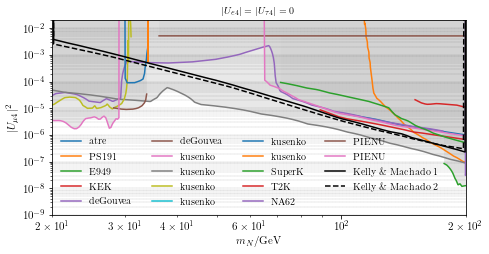

In [62]:
axmu, figmu = plot_lines('mu',m4min=0.02,m4max=0.2,units=1e3)

x = np.logspace(np.log10(20),np.log10(200), 1000)

this_file = 'digitized/muboone_kelly_machado/PS_eff_avg.dat'
m4, Umu4sq = np.genfromtxt(this_file, unpack=True)
units = 1
f = interpolate.interp1d(m4*units, Umu4sq, kind='linear', bounds_error=False, fill_value=1.0, assume_sorted=False)    
axmu.plot(x, f(x), c='black', ls='-', label='Kelly \& Machado 1')


this_file = 'digitized/muboone_kelly_machado/PS_eff_scalar.dat'
m4, Umu4sq = np.genfromtxt(this_file, unpack=True)
units = 1
f = interpolate.interp1d(m4*units, Umu4sq, kind='linear', bounds_error=False, fill_value=1.0, assume_sorted=False)    
axmu.plot(x, f(x), c='black', ls='--', label='Kelly \& Machado 2')


axmu.set_title(r"$|U_{e4}| = |U_{\tau 4}| = 0$",fontsize=10)
axmu.legend(loc='lower left', frameon=False, ncol=4)


figmu.patch.set_visible(False)
figmu.savefig('plots/mu4.png',dpi=400)

In [39]:
def plot_all_lines(flavor, save=False, invisible=False):
    fsize = 11
    rc('text', usetex=True)
    params={'axes.labelsize':fsize,'xtick.labelsize':fsize,'ytick.labelsize':fsize,\
                    'figure.figsize':(2*3.375,1.5*2.375)	}
    rc('font',**{'family':'serif', 'serif': ['computer modern roman']})
    rcParams.update(params)
    axes_form  = [0.1,0.16,0.85,0.76]


    fig = plt.figure()
    ax = fig.add_axes(axes_form)

    ################################
    # range of N mass
    MN_MIN = 1e-3 # GeV
    MN_MAX = 1e2 # GeV
    MN = np.logspace(np.log10(MN_MIN),np.log10(MN_MAX),1000)

    ##############################################
    # decide on a flavor
    usqr_bound = umu4.USQR(MN)
    usqr_bound_inv = umu4.USQR_inv(MN)

    ##############################################
    # Constraints on U\alpha4^2
    ax.plot(MN, usqr_bound, color='navy', )
    ax.fill_between(MN, usqr_bound, np.ones(np.size(MN)), 
                    fc='dodgerblue', ec='None', lw =0.0, alpha=0.5, label=r'all bounds')
    ax.plot(MN, usqr_bound_inv, color='red', ls='--', label='inv bounds')


    ax.set_title(r"Some plot",fontsize=fsize)
    ax.legend(loc='lower right', frameon=False)
    ax.set_xlim(MN_MIN,MN_MAX)
    ax.set_ylim(1e-10,1)
    ax.set_xscale("log")
    ax.set_yscale("log")
    ax.set_ylabel(label[flavor])
    ax.set_xlabel(r"$m_{N}$/GeV")
    ax.set_yticks([1e-9, 1e-8, 1e-7, 1e-6, 1e-5, 1e-4, 1e-3,1e-2,1e-1,1])
    ax.grid(axis='y', which='both',dashes=(6,1),alpha=0.5,c='black',lw=0.2)
    if save:
        fig.savefig('plots/u'+flavor+'4.pdf')
    return ax, fig

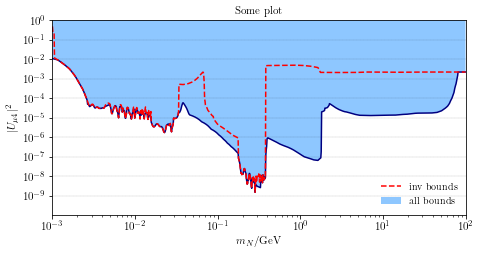

In [19]:
axmu, figmu = plot_all_lines('mu')